# Bagging vs Single Decision Tree

## Objective

Understand how Bagging reduces variance
by averaging multiple high-variance decision trees.

We compare:

- Single deep decision tree
- Bagging ensemble of trees
- Train vs test performance
- Bias–variance behavior

## Theoretical Background

A single deep decision tree:

- Low bias
- High variance
- Sensitive to small data changes

Bagging (Bootstrap Aggregating):

1. Sample data with replacement (bootstrap)
2. Train multiple models on different samples
3. Average predictions

Variance of ensemble:

Var(ensemble) = ρσ² + (1 − ρ)σ² / T

Where:
- ρ = correlation between trees
- T = number of trees

Bagging reduces variance when trees are decorrelated.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
X, y = make_moons(
    n_samples=500, noise=0.30, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

## Single Deep Decision Tree

In [4]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [5]:
print(tree.__class__.__name__)
print("accuracy on training set:", accuracy_score(y_train, tree.predict(X_train)))
print("accuracy on test set:", accuracy_score(y_test, tree.predict(X_test)))

DecisionTreeClassifier
accuracy on training set: 1.0
accuracy on test set: 0.8533333333333334


### Interpretation

- Training accuracy is typically very high.
- Test accuracy drops due to overfitting.
- High variance model.

## Bagging Ensemble

In [6]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42),
    n_estimators=200,
    bootstrap=True,
    random_state=42
)

bag_clf.fit(X_train, y_train)

,"estimator estimator: object, default=NoneThe base estimator to fit on random subsets of the dataset.If None, then the base estimator is a:class:`~sklearn.tree.DecisionTreeClassifier`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",DecisionTreeC...ndom_state=42)
,"n_estimators n_estimators: int, default=10The number of base estimators in the ensemble.",200
,"max_samples max_samples: int or float, default=NoneThe number of samples to draw from X to train each base estimator (withreplacement by default, see `bootstrap` for more details).- If None, then draw `X.shape[0]` samples irrespective of `sample_weight`.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` unweighted samples or `max_samples * sample_weight.sum()` weighted samples.",None
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator (without replacement by default, see `bootstrap_features` for moredetails).- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.",1.0
,"bootstrap bootstrap: bool, default=TrueWhether samples are drawn with replacement. If False, sampling withoutreplacement is performed. If fitting with `sample_weight`, it isstrongly recommended to choose True, as only drawing with replacementwill ensure the expected frequency semantics of `sample_weight`.",True
,"bootstrap_features bootstrap_features: bool, default=FalseWhether features are drawn with replacement.",False
,"oob_score oob_score: bool, default=FalseWhether to use out-of-bag samples to estimatethe generalization error. Only available if bootstrap=True.",False
,"warm_start warm_start: bool, default=FalseWhen set to True, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fita whole new ensemble. See :term:`the Glossary `... versionadded:: 0.17 *warm_start* constructor parameter.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for both :meth:`fit` and:meth:`predict`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random resampling of the original dataset(sample wise and feature wise).If the base estimator accepts a `random_state` attribute, a differentseed is generated for each instance in the ensemble.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity when fitting and predicting.",0


In [7]:
print(bag_clf.__class__.__name__)
print("accuracy on training set:", accuracy_score(y_train, bag_clf.predict(X_train)))
print("accuracy on test set:", accuracy_score(y_test, bag_clf.predict(X_test)))

BaggingClassifier
accuracy on training set: 1.0
accuracy on test set: 0.9


## Bias–Variance Analysis

Single Tree:
- Very low bias
- High variance
- Overfits training data

Bagging:
- Maintains low bias
- Reduces variance
- Improves test performance

Bagging works because bootstrap sampling
creates diversity between trees,
and averaging reduces instability.

## Decision Boundary Visualization

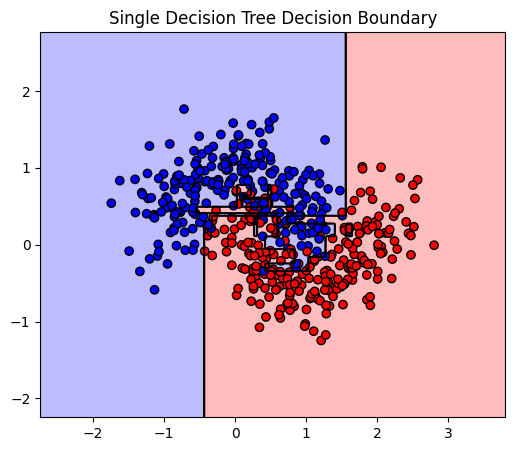

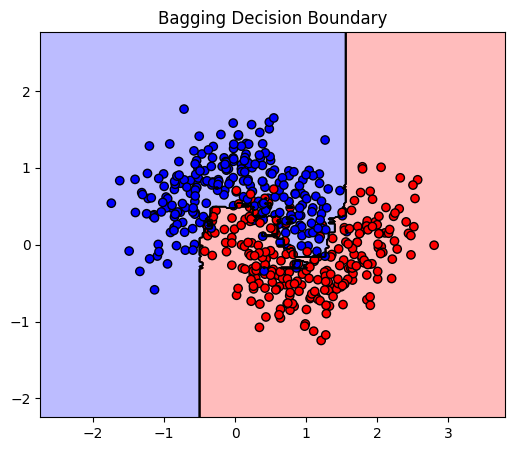

In [9]:
def plot_decision_boundary(model, X, y, title):
    x0, x1 = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 300),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 300)
    )

    X_grid = np.c_[x0.ravel(), x1.ravel()]
    y_pred = model.predict(X_grid).reshape(x0.shape)

    plt.figure(figsize=(6,5))
    plt.contourf(x0, x1, y_pred, alpha=0.3, cmap="bwr")
    plt.contour(x0, x1, y_pred, colors="k", linewidths=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor="k")
    plt.title(title)
    plt.show()

plot_decision_boundary(tree, X, y,
                       "Single Decision Tree Decision Boundary")

plot_decision_boundary(bag_clf, X, y,
                       "Bagging Decision Boundary")

### Visual Interpretation

Single Tree:
- Highly irregular boundary
- Fits noise

Bagging:
- Smoother boundary
- Reduced instability
- Better generalization

## Out-of-Bag (OOB) Evaluation

In [10]:
bag_oob = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=200,
    bootstrap=True,
    oob_score=True,
    random_state=42
)

bag_oob.fit(X_train, y_train)

print("OOB Score:", bag_oob.oob_score_)

OOB Score: 0.8914285714285715


## What Is OOB Score?

Each tree is trained on a bootstrap sample (~63% of data).

Remaining ~37% are Out-of-Bag samples.

OOB score provides an internal
validation estimate without a separate validation set.

## Engineering Takeaways

- Bagging reduces variance, not bias.
- Works best with high-variance models.
- Deep trees are ideal base learners.
- Diversity is critical for ensemble success.
- OOB scoring can replace cross-validation.